In [31]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

import multi_GMM_with_NN as MN

class RegressionNet(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(RegressionNet, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.elu = nn.ELU()
            self.fc2 = nn.Linear(hidden_size, hidden_size)
            self.elu = nn.ELU()
            self.fc3 = nn.Linear(hidden_size, output_size)

        def forward(self, x): 
            out = self.fc1(x)
            out = self.elu(out)
            out = self.fc2(out)
            out = self.elu(out)
            out = self.fc3(out)
            return out
        
def neural_network_with_GMM_train(X,Y):
    input_size = 10
    hidden_size = 256
    output_size = 1

    GMM_model = RegressionNet(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(GMM_model.parameters(), lr=0.001)

    num_epochs = 1000
    train_loss = []
    test_loss = []
    for epoch in range(num_epochs):
        # 前向传播
        outputs = GMM_model(X)
        loss = criterion(outputs, Y) #+ 0.0001*data_loss(X,Y,outputs)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 打印训练过程中的损失
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        train_loss.append(loss.item())

        #predictions = model(test_x)
        #tt_loss = criterion(predictions,test_y)
        #test_loss.append(tt_loss.item())

    return GMM_model

def neural_network_onlyRTTGMM_train(X,Y):
    input_size = 8
    hidden_size = 256
    output_size = 1

    GMM_model = RegressionNet(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(GMM_model.parameters(), lr=0.001)

    num_epochs = 1000
    train_loss = []
    test_loss = []
    for epoch in range(num_epochs):
        # 前向传播
        outputs = GMM_model(X)
        loss = criterion(outputs, Y) #+ 0.0001*data_loss(X,Y,outputs)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 打印训练过程中的损失
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        train_loss.append(loss.item())

        #predictions = model(test_x)
        #tt_loss = criterion(predictions,test_y)
        #test_loss.append(tt_loss.item())

    return GMM_model

def neural_network_2input(X,Y):
    input_size = 2
    hidden_size = 256
    output_size = 1

    GMM_model = RegressionNet(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(GMM_model.parameters(), lr=0.001)

    num_epochs = 1000
    train_loss = []
    test_loss = []
    for epoch in range(num_epochs):
        # 前向传播
        outputs = GMM_model(X)
        loss = criterion(outputs, Y) #+ 0.0001*data_loss(X,Y,outputs)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 打印训练过程中的损失
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        train_loss.append(loss.item())

        #predictions = model(test_x)
        #tt_loss = criterion(predictions,test_y)
        #test_loss.append(tt_loss.item())

    return GMM_model

def neural_network_predicting(model,test_x):
    # 在测试集上进行预测
    with torch.no_grad():
        predictions = model(test_x)

    predictions = predictions.numpy()
    return predictions

def neural_network_without_GMM_train(X,Y):
    input_size = 4
    hidden_size = 256
    output_size = 1

    model = RegressionNet(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 1000
    train_loss = []
    test_loss = []
    for epoch in range(num_epochs):
        # 前向传播
        outputs = model(X)
        loss = criterion(outputs, Y) #+ 0.0001*data_loss(X,Y,outputs)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 打印训练过程中的损失
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        train_loss.append(loss.item())

        #predictions = model(test_x)
        #tt_loss = criterion(predictions,test_y)
        #test_loss.append(tt_loss.item())

    return model
    
def GMM_filter(data):
    #best_aic,best_bic = compute_number_of_components(data,1,5)
    #n_components = best_aic  # 设置成分数量
    n_components = 2
    gmm = GaussianMixture(n_components=n_components)
    try:
        gmm.fit(data)
    except:
        lenghts = len(data)
        gmm.fit(data.reshape((lenghts,1)))
    means = gmm.means_
    covariances = gmm.covariances_
    weights = gmm.weights_

    return means,covariances,weights

def data_process_NN(train_set_file):
    with open(train_set_file, 'r') as train_file:
        lines = train_file.readlines()

    X = np.array([0,0,0,0,0,0,0,0,0,0])
    for i in range(len(lines)):
        line = lines[i].strip().split(' ')
        line = [float(num) for num in line]     #200rtt + 200rssi

        means,covariances,weights = GMM_filter(np.array(line)[:200] - 20074.659)
        
        rtt_mean = np.mean(line[:200]) - 20074.659
        rtt_var = np.var(line[:200])
        rssi_mean = np.mean(line[200:])
        rssi_var = np.var(line[200:])
        X = np.vstack((X, np.array([float(means[0][0]),float(covariances[0][0]),float(means[1][0]),float(covariances[1][0]),
                                    float(weights[0]),float(weights[1]),
                                    rssi_mean,rssi_var,rtt_mean,rtt_var])))

    X = X[1:,:]  #去掉第一行的0
    return X

def generate_train_test_y():
    distance_list = [i for i in range(1,12)]
    train_y = np.array([0])
    for distance in distance_list:
        for j in range(int(len(train_x)/len(distance_list))):
            train_y = np.vstack((train_y,distance))
    train_y = train_y[1:,:]

    test_y = np.array([0])
    for distance in distance_list:
        for j in range(int(len(test_x)/len(distance_list))):
            test_y = np.vstack((test_y,distance))
    test_y = test_y[1:,:]
    return train_y, test_y

def transform_error(error_array):
    error_list = []
    for i in range(11):
        error_list.append(error_array.reshape(220,)[i*20:(i+1)*20])
    error_array = np.array(error_list).T
    return error_array

def traditional_prediction(data):
    prediction_list = []
    for i in range(len(data)):
        prediction = (data[i][8])/2*299792458/16000000*0.4
        prediction_list.append(np.array(prediction))
    predictions = np.array(prediction_list)
    return predictions

train_x = data_process_NN('train_set/outdoor_train_set.txt')
test_x = data_process_NN('test_set/outdoor_test_set.txt')

train_x = data_process_NN('train_set/indoor_with_people_walking_train_set.txt')
test_x = data_process_NN('test_set/indoor_with_people_walking_test_set.txt')

train_x = data_process_NN('train_set/indoor_without_people_walking_train_set.txt')
test_x = data_process_NN('test_set/indoor_without_people_walking_test_set.txt')

train_y,test_y = generate_train_test_y()

X = torch.from_numpy(train_x[:,:]).float()
Y = torch.from_numpy(train_y).float()
test_X = torch.from_numpy(test_x[:,:]).float()
test_Y = torch.from_numpy(test_y).float()

X_hat = torch.from_numpy(train_x[:,6:]).float()
test_X_het = torch.from_numpy(test_x[:,6:]).float()

x_onlyRTT = torch.from_numpy(np.delete(train_x,[6,7],axis=1)).float()
test_x_onlyRTT = torch.from_numpy(np.delete(test_x,[6,7],axis=1)).float()

x_RTT = torch.from_numpy(np.delete(train_x,[0,1,2,3,4,5,6,7],axis=1)).float()
test_x_RTT = torch.from_numpy(np.delete(test_x,[0,1,2,3,4,5,6,7],axis=1)).float()

x_RSSI = torch.from_numpy(np.delete(train_x,[0,1,2,3,4,5,8,9],axis=1)).float()
test_x_RSSI = torch.from_numpy(np.delete(test_x,[0,1,2,3,4,5,8,9],axis=1)).float()

NN_with_GMM_model = neural_network_with_GMM_train(X,Y)
torch.save(NN_with_GMM_model, 'NN_with_GMM_model.pth')
NN_without_GMM_model = neural_network_without_GMM_train(X_hat,Y)
torch.save(NN_without_GMM_model, 'NN_without_GMM_model.pth')
NN_withonlyRTT_GMM_model = neural_network_onlyRTTGMM_train(x_onlyRTT,Y)
NN_RTT_model = neural_network_2input(x_RTT,Y)
torch.save(NN_RTT_model, 'NN_RTT_model.pth')
NN_RSSI_model = neural_network_2input(x_RSSI,Y)

NN_with_GMM_predictions = neural_network_predicting(NN_with_GMM_model,test_X)
NN_without_GMM_predictions = neural_network_predicting(NN_without_GMM_model,test_X_het)
NN_withonlyRTT_GMM_predictions = neural_network_predicting(NN_withonlyRTT_GMM_model,test_x_onlyRTT)
NN_RTT_predictions = neural_network_predicting(NN_RTT_model,test_x_RTT)
NN_RSSI_predictions = neural_network_predicting(NN_RSSI_model,test_x_RSSI)

with_GMM_error = NN_with_GMM_predictions - test_y
with_GMM_error = transform_error(with_GMM_error)

without_GMM_error = NN_without_GMM_predictions - test_y
without_GMM_error = transform_error(without_GMM_error)

with_onlyRTT_GMM_error = NN_withonlyRTT_GMM_predictions - test_y
with_onlyRTT_GMM_error = transform_error(with_onlyRTT_GMM_error)

NN_RTT_error = NN_RTT_predictions - test_y
NN_RTT_error = transform_error(NN_RTT_error)

NN_RSSI_error = NN_RSSI_predictions - test_y
NN_RSSI_error = transform_error(NN_RSSI_error)

traditional_predictions = traditional_prediction(test_x)
traditional_error = traditional_predictions.reshape((220,1)) - test_y
traditional_error = transform_error(traditional_error)


def trimmed_data(error):
    trimmed_data = []
    for i in range(error.shape[1]):
        column_data = error[:, i]  # 取出每一组数据
        trimmed_column = np.clip(column_data, np.percentile(column_data, 10), np.percentile(column_data, 90))
        trimmed_data.append(trimmed_column)

    # 转换为numpy数组
    trimmed_data = np.column_stack(trimmed_data)
    return trimmed_data

with_GMM_error = trimmed_data(with_GMM_error)
without_GMM_error = trimmed_data(without_GMM_error)
with_onlyRTT_GMM_error = trimmed_data(with_onlyRTT_GMM_error)
NN_RTT_error = trimmed_data(NN_RTT_error)
NN_RSSI_error = trimmed_data(NN_RSSI_error)
traditional_error = trimmed_data(traditional_error)

C:\Users\11422\AppData\Local\Temp\ipykernel_29572\917968816.py:194: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X = np.vstack((X, np.array([float(means[0][0]),float(covariances[0][0]),float(means[1][0]),float(covariances[1][0]),
C:\Users\11422\AppData\Local\Temp\ipykernel_29572\917968816.py:194: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X = np.vstack((X, np.array([float(means[0][0]),float(covariances[0][0]),float(means[1][0]),float(covariances[1][0]),
C:\Users\11422\AppData\Local\Temp\ipykernel_29572\917968816.py:194: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure

Epoch [1/1000], Loss: 926079.4375
Epoch [2/1000], Loss: 7165100.0000
Epoch [3/1000], Loss: 961334.1250
Epoch [4/1000], Loss: 808129.5000
Epoch [5/1000], Loss: 3093160.5000
Epoch [6/1000], Loss: 2315243.5000
Epoch [7/1000], Loss: 507435.8750
Epoch [8/1000], Loss: 54336.3516
Epoch [9/1000], Loss: 928018.1250
Epoch [10/1000], Loss: 1562772.2500
Epoch [11/1000], Loss: 1171970.6250
Epoch [12/1000], Loss: 358739.1562
Epoch [13/1000], Loss: 155.6536
Epoch [14/1000], Loss: 306355.0312
Epoch [15/1000], Loss: 753703.5625
Epoch [16/1000], Loss: 790114.5625
Epoch [17/1000], Loss: 421695.7188
Epoch [18/1000], Loss: 62310.7930
Epoch [19/1000], Loss: 32898.4453
Epoch [20/1000], Loss: 267945.6562
Epoch [21/1000], Loss: 446468.1875
Epoch [22/1000], Loss: 357916.2188
Epoch [23/1000], Loss: 127307.4297
Epoch [24/1000], Loss: 941.3754
Epoch [25/1000], Loss: 76028.7891
Epoch [26/1000], Loss: 216575.7969
Epoch [27/1000], Loss: 240379.5469
Epoch [28/1000], Loss: 130278.1641
Epoch [29/1000], Loss: 17621.4258


<Figure size 640x480 with 0 Axes>

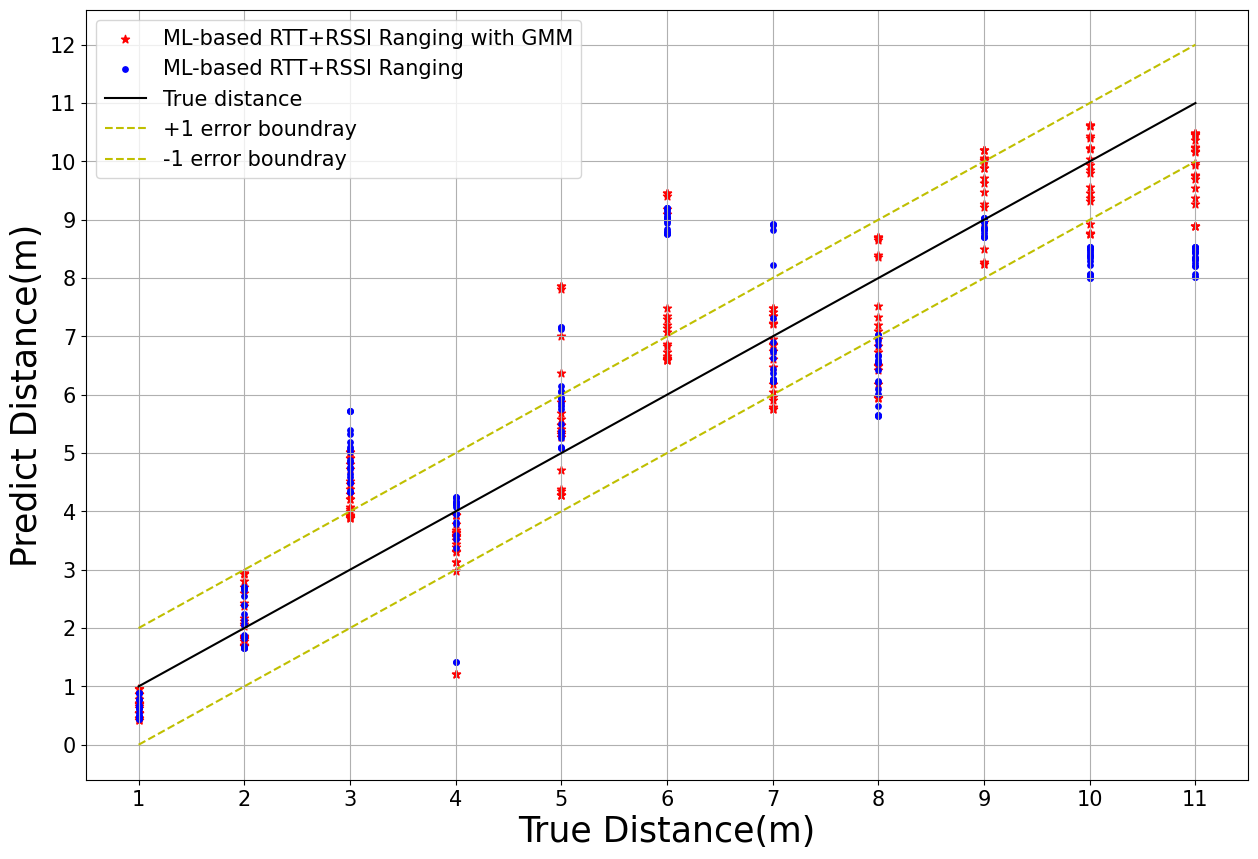

In [36]:
from matplotlib.pyplot import MultipleLocator
plt.figure()
plt.figure(figsize=(15,10))
ax = plt.subplot(111)
for i in range(0,11):
    if i == 1:
        ax.scatter([i+1]*20, with_GMM_error[:,i]+i+1, c = 'r', marker = '*', label = 'ML-based RTT+RSSI Ranging with GMM')
        ax.scatter([i+1]*20, without_GMM_error[:,i]+i+1, c = 'b',s = 15, marker = 'o', label = 'ML-based RTT+RSSI Ranging')
        #ax.scatter([i+1]*20, traditional_error[:,i]+i+1, c = 'g',s = 15, marker = '+', label = 'traditional prediction')
    else:
        ax.scatter([i+1]*20, with_GMM_error[:,i]+i+1, c = 'r', marker = '*')
        ax.scatter([i+1]*20, without_GMM_error[:,i]+i+1, c = 'b',s = 15, marker = 'o')
        #ax.scatter([i+1]*20, traditional_error[:,i]+i+1, c = 'g',s = 15, marker = '+')

ax.plot([i for i in range(1,12)], [i for i in range(1,12)], c = 'black', label = 'True distance')
ax.plot([i for i in range(1,12)], [i+1 for i in range(1,12)], c = 'y', linestyle = '--', label = '+1 error boundray')
ax.plot([i for i in range(1,12)], [i-1 for i in range(1,12)], c = 'y', linestyle = '--', label = '-1 error boundray')
#ax.set_aspect(1)
ax.grid(True)
#ax.set_xlim((0,12))
#my_x_ticks = np.arange(0, 12, 1)
#ax.set_xticks(my_x_ticks)
#ax.set_ylim((0,12))
#my_y_ticks = np.arange(0, 12, 1)
#ax.set_yticks(my_y_ticks)
ax.set_xlabel('True Distance(m)', fontdict={'weight': 'normal', 'size': 25})
ax.set_ylabel('Predict Distance(m)', fontdict={'weight': 'normal', 'size': 25})
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
plt.rcParams.update({'font.size': 15})
plt.legend()
plt.savefig('gmm_performance.svg',dpi=1000,format='svg')
plt.show()


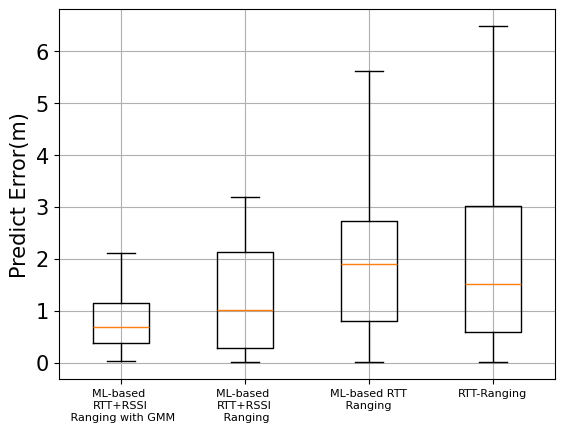

In [35]:
plt.figure()
plt.boxplot([np.abs(with_GMM_error.reshape(-1)), np.abs(without_GMM_error.reshape(-1)), np.abs(NN_RTT_error.reshape(-1)), np.abs(traditional_error.reshape(-1))],showfliers=False)
#plt.title('predict error of different model')
labels = ['ML-based \nRTT+RSSI\n Ranging with GMM', 'ML-based \nRTT+RSSI\n Ranging', 'ML-based RTT\n Ranging ', 'RTT-Ranging']


plt.xticks([1, 2, 3, 4,], labels, fontdict={'weight': 'normal', 'size': 8})
plt.setp(plt.gca().get_xticklabels(), multialignment='center')
plt.ylabel('Predict Error(m)', fontdict={'weight': 'normal', 'size': 15})
plt.grid()
plt.savefig('different_ranging_methods.svg',dpi=300,format='svg')
plt.show()
